In [1]:
from code import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Вывод формул (в том виде, в котором идет подсчет в коде)

$p(c)$ маргинализуем по всем переменным кроме $c$ из общей своместной плотности.

$p(c)=\sum\limits_{a=a_{min}}^{a_{max}}\sum\limits_{b=b_{min}}^{b_{max}}p(a, b, c)=\sum\limits_{a=a_{min}}^{a_{max}}\sum\limits_{b=b_{min}}^{b_{max}}p(a)p(b)p(c|a,b)=\frac{1}{(a_{max}-a_{min}+1)(b_{max}-b_{min}+1)}\sum\limits_{a=a_{min}}^{a_{max}}\sum\limits_{b=b_{min}}^{b_{max}}p(c|a,b)$

Посчитав $p(c)$ можем посчитать $p(d)$ с помощью марганализации по $c$ совместной плотности $c$ и $d$.

$p(d)=\sum\limits_{c=c_{min}}^{c_{max}}p(c, d)=\sum\limits_{c=c_{min}}^{c_{max}}p(c)p(d|c)$

Для подсчета $p(b|d_1,\ldots,d_N)$ воспользуемся определением условной вероятности

$p(b|d_1,\ldots,d_N)=\frac{p(b, d_1, \ldots, d_N)}{p(d_1, \ldots, d_N)}$

$p(b,d_1,\ldots,d_n)=\sum\limits_{a=a_{min}}^{a_{max}}\sum\limits_{c_1=c_{min}}^{c_{max}}\ldots\sum\limits_{c_N=c_{min}}^{c_{max}}p(a)p(b)\prod\limits_{n=1}^Np(d_n|c_n)p(c_n|a,b)=\frac{1}{(a_{max}-a_{min}+1)(b_{max}-b_{min}+1)}\sum\limits_{a=a_{min}}^{a_{max}}\sum\limits_{c_1=c_{min}}^{c_{max}}\ldots\sum\limits_{c_N=c_{min}}^{c_{max}}\prod\limits_{n=1}^Np(d_n|c_n)p(c_n|a,b)=\frac{1}{(a_{max}-a_{min}+1)(b_{max}-b_{min}+1)}\sum\limits_{a=a_{min}}^{a_{max}}\prod\limits_{n=1}^N\bigl(\sum\limits_{c_n=c_{min}}^{c_{max}}p(d_n|c_n)p(c_n|a,b)\bigr)$

Выражение для $p(d_1, \ldots, d_N)$ получается из выражения для $p(b,d_1,\ldots,d_n)$ маргинализацией по $b$. При этом так как множитель $\frac{1}{(a_{max}-a_{min}+1)(b_{max}-b_{min}+1)}$ встречается как в числитиле, так и в знаминателе, его можно отбросить.

$p(d_1, \ldots, d_N)=\sum\limits_{b=b_{min}}^{b_{max}}p(b,d_1,\ldots,d_n)$

Вычисление $p(b|a,d_1,\ldots,d_N)$ производится аналогично $p(b|d_1,\ldots,d_N)$, только марганализировать по $a$ при этом не нужно.

$p(b|a,d_1,\ldots,d_N)=\frac{p(a, b, d_1, \ldots, d_N)}{p(a, d_1, \ldots, d_N)}$

$p(a, b,d_1,\ldots,d_n)=\sum\limits_{c_1=c_{min}}^{c_{max}}\ldots\sum\limits_{c_N=c_{min}}^{c_{max}}p(a)p(b)\prod\limits_{n=1}^Np(d_n|c_n)p(c_n|a,b)=\frac{1}{(a_{max}-a_{min}+1)(b_{max}-b_{min}+1)}\sum\limits_{c_1=c_{min}}^{c_{max}}\ldots\sum\limits_{c_N=c_{min}}^{c_{max}}\prod\limits_{n=1}^Np(d_n|c_n)p(c_n|a,b)=\frac{1}{(a_{max}-a_{min}+1)(b_{max}-b_{min}+1)}\prod\limits_{n=1}^N\bigl(\sum\limits_{c_n=c_{min}}^{c_{max}}p(d_n|c_n)p(c_n|a,b)\bigr)$
$p(a, d_1, \ldots, d_N)=\sum\limits_{b=b_{min}}^{b_{max}}p(a, b,d_1,\ldots,d_n)$

Все вероятности, используемые в конечных формулах выше, кроме $p(c|a,b)$ в 3 модели, являются вероятностями биномиалльного распределения или распределения Пуассона. В модели 3 плотность $p(c|a,b)$ является сверткой плотностей друх биномиальных распределений

$p(c|a,b)=(p_{Bin(a, p1)} * p_{Bin(b, p2)})(c)$

Примечание. При реализации интересно, что в некоторых местах (для больших осей) эффективне использовать векторные операции, а для других - питоновские циклы (если оси маленькие это позволяет сэкономить не только память, но и даже немного ускорить работу)

# 2. Подсчет математических ожиданий и дисперсий

In [2]:
def mean(probs, values):
    return (probs.reshape([-1]) * values).sum()

def var(probs, values):
    return (probs.reshape([-1]) * (values - mean(probs, values)) ** 2).sum()

In [3]:
params = {"amin": 75, "amax": 90, "bmin": 500, "bmax": 600, "p1": 0.1, "p2": 0.01, "p3": 0.3, "N": 50}
names = ["a", "b", "c", "d"]
functions = [pa, pb, pc, pd]
for model in [3, 4]:
    print("В модели {}".format(model))
    for name, function in zip(names, functions):
        E = mean(*function(params, model))
        D = var(*function(params, model))
        print("    Матожидание {name}: {E} Дисперсия {name}: {D}".format(
            name=name,
            E=E,
            D=D)
        )

В модели 3
    Матожидание a: 82.5 Дисперсия a: 21.25
    Матожидание b: 549.9999999999999 Дисперсия b: 850.0000000000001
    Матожидание c: 13.749999999999899 Дисперсия c: 13.16749999999968
    Матожидание d: 17.874999999999876 Дисперсия d: 25.14057499999943
В модели 4
    Матожидание a: 82.5 Дисперсия a: 21.25
    Матожидание b: 549.9999999999999 Дисперсия b: 850.0000000000001
    Матожидание c: 13.749999999999996 Дисперсия c: 14.047500000000008
    Матожидание d: 17.875 Дисперсия d: 26.62777500000001


# 4. Оценка $b$ по $d$
Построим графики матожидания и дисперсии апостериорного распределения $b$ от размера выборки d, сгенерированной из распределения с константными значениями a и b для моделей 3 и 4 с известным и не известным значением a.

In [4]:
def generate_ab(N, a, b, model):
    return generate(N, np.array([a]), np.array([b]), params, 3)[:, 0, 0]


def get_means_and_vars(d):
    pb_d_probs_and_vals = {
        model: [
            pb_d(np.array([d[model][:t]]), params, model)
            for t in range(1, N)
        ]
        for model in [3, 4]
    }
    pb_ad_probs_and_vals = {
        model: [
            pb_ad(np.array([a_mean]), np.array([d[model][:t]]), params, model)
            for t in range(1, N)
        ]
        for model in [3, 4]
    }
    means, vars, names = [], [], []
    for model in [3, 4]:
        means += [
            list(map(lambda args: mean(*args), pb_d_probs_and_vals[model])),
            list(map(lambda args: mean(*args), pb_ad_probs_and_vals[model]))
        ]
        vars += [
            list(map(lambda args: var(*args), pb_d_probs_and_vals[model])),
            list(map(lambda args: var(*args), pb_ad_probs_and_vals[model]))  
        ]
        names += ["model_{}_no_a".format(model), "model_{}_with_a".format(model)]
    return means, vars, names

In [5]:
a_mean = 83
b_mean = 550
N = 50

In [6]:
d = {
    model: generate_ab(N, a_mean, b_mean, model)
    for model in [3, 4]
}
means, vars, names = get_means_and_vars(d)

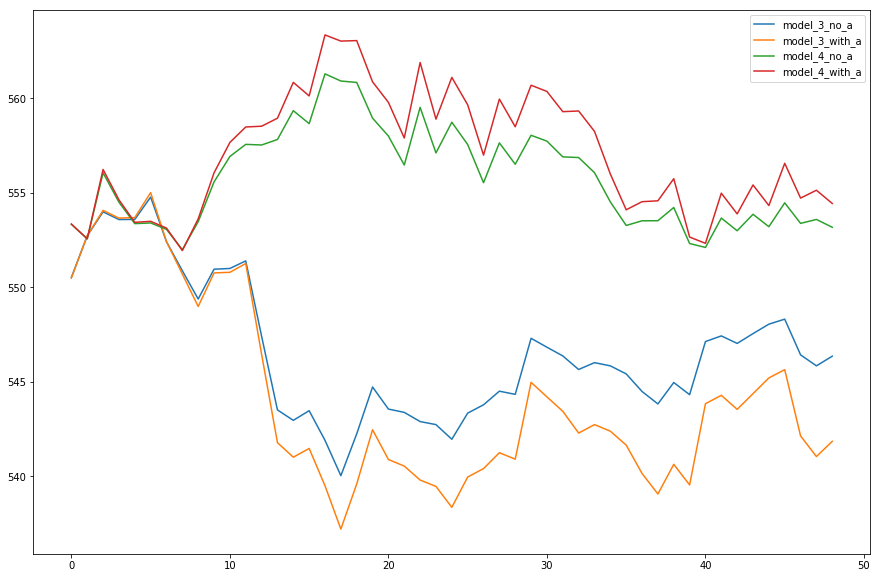

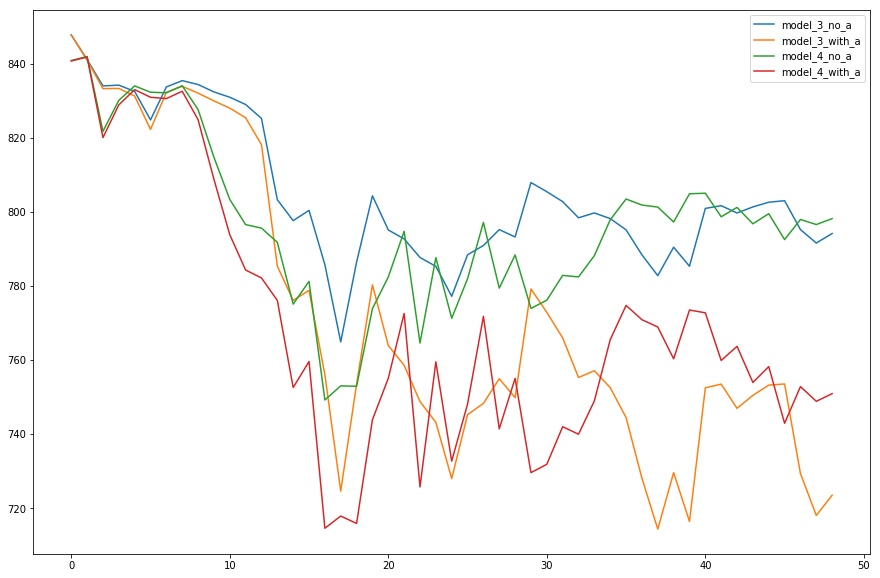

In [7]:
plt.figure(figsize=(15, 10))
for cur_mean, name in zip(means, names):
    plt.plot(cur_mean, label=name)
plt.legend()
plt.figure(figsize=(15, 10))
for cur_var, name in zip(vars, names):
    plt.plot(cur_var, label=name)
plt.legend()
plt.show()

Как видно, матожидание не уходит далеко от истинного значения, дисперсия уменьшается. Заметно, что дисперися модели с известным значением "a" падает быстрее. Это логично, ведь в такой модели нет необходимости подстраиваться под ее реальное распределение. Также видно, что распределения с известным и не известным a сильно коррелируют. Построим те же самые графики, при которых выборка d наполняется одинаковыми числами - $Ed$

In [8]:
d = {
    model: np.full(N, 18)
    for model in [3, 4]
}
means, vars, names = get_means_and_vars(d)

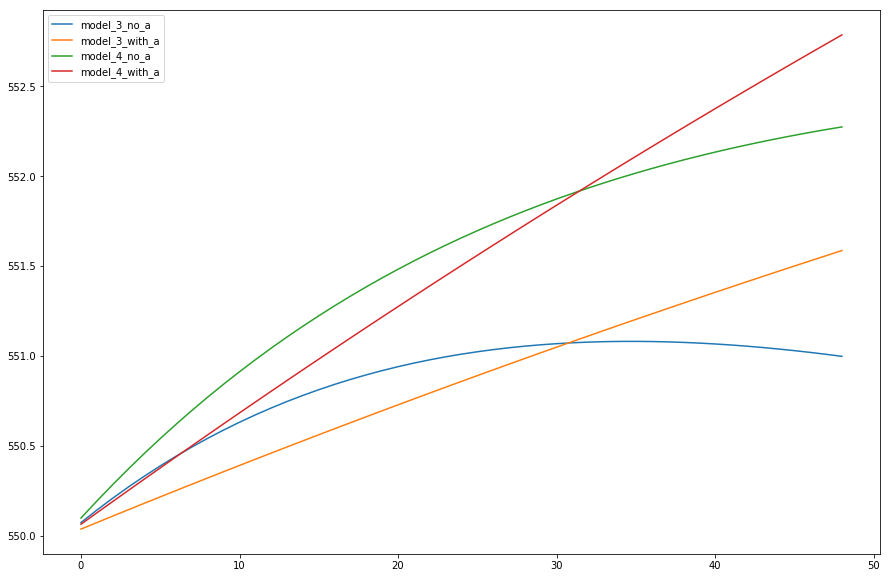

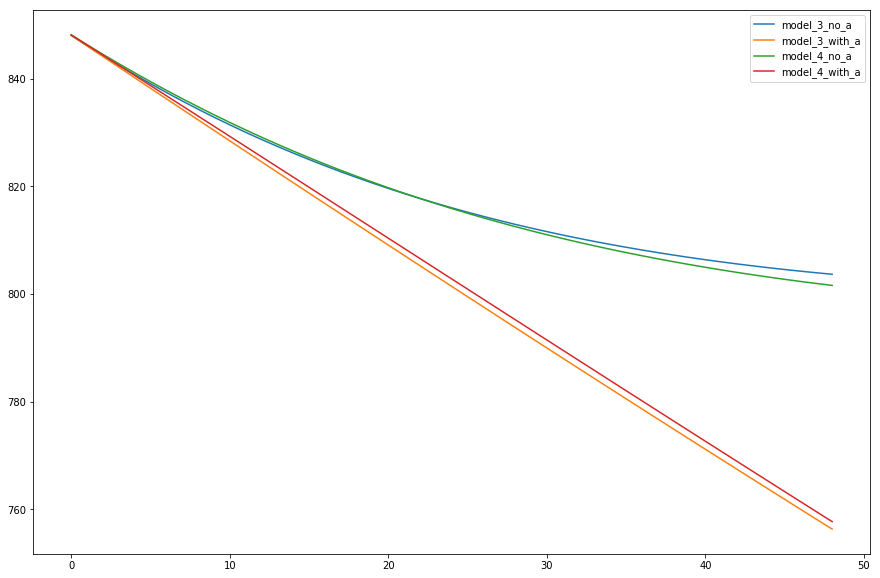

In [9]:
plt.figure(figsize=(15, 10))
for cur_mean, name in zip(means, names):
    plt.plot(cur_mean, label=name)
plt.legend()
plt.figure(figsize=(15, 10))
for cur_var, name in zip(vars, names):
    plt.plot(cur_var, label=name)
plt.legend()
plt.show()

Тенденция дисперсии распределния с известным a падать быстрее сохранилась. Матожидение всех моделей, особенно приближенных, отдаляется от реального значения. При этом его дисперсия продолжает падать. Это может быть объяснено тем, что выборка d у нас не из настоящего распределения, а из достаточно грубого его приближения - дельта-функции в точке максимума плотности.

# 5. Оценка времени работы
Для оценки времени работы функций воспользуемся мэджиком timeit

In [22]:
names = ['pc', 'pd', 'pb_d', 'pb_ad']
for model in [3, 4]:
    print("Время работы pc:")
    %timeit pc(params, model)
    print("Время работы pd:")
    %timeit pd(params, model)
    print("Время работы pb_d:")
    %timeit pb_d(np.array([d[3]]), params, model)
    print("Время работы pb_ad:")
    %timeit pb_ad(np.array([a_mean]), np.array([d[3]]), params, model)

Время работы pc:
340 µs ± 12.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Время работы pd:
1.49 ms ± 106 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Время работы pb_d:
1.23 ms ± 92.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Время работы pb_ad:
714 µs ± 26.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Время работы pc:
117 µs ± 4.03 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Время работы pd:
1.3 ms ± 94.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Время работы pb_d:
1.08 ms ± 20.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Время работы pb_ad:
576 µs ± 28 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Как видно, все функции в секунду укладываются.

# 5. Когда приближенная модель не работает?
Очевидно приближенная модель работает плохо, когда Пуассоновское распределение плохо приближает сумму биномиальных. То есть при маленьком числе испытаний и вероятностях, далеких от крайних значений. Построим графики с такими параметрами.

In [17]:
params = {"amin": 1, "amax": 3, "bmin": 1, "bmax": 3, "p1": 0.5, "p2": 0.5, "p3": 0.3, "N": 50}
names = ["a", "b", "c", "d"]
functions = [pa, pb, pc, pd]
for model in [3, 4]:
    print("В модели {}".format(model))
    for name, function in zip(names, functions):
        E = mean(*function(params, model))
        D = var(*function(params, model))
        print("    Матожидание {name}: {E} Дисперсия {name}: {D}".format(
            name=name,
            E=E,
            D=D)
        )

В модели 3
    Матожидание a: 2.0 Дисперсия a: 0.6666666666666666
    Матожидание b: 2.0 Дисперсия b: 0.6666666666666666
    Матожидание c: 2.0 Дисперсия c: 1.3333333333333335
    Матожидание d: 2.599999999999999 Дисперсия d: 2.673333333333333
В модели 4
    Матожидание a: 2.0 Дисперсия a: 0.6666666666666666
    Матожидание b: 2.0 Дисперсия b: 0.6666666666666666
    Матожидание c: 1.9360885783225052 Дисперсия c: 2.072961069615472
    Матожидание d: 2.5169151518192567 Дисперсия d: 3.909882809097873


In [18]:
d = {
    model: generate_ab(N, 2, 2, model)
    for model in [3, 4]
}
means, vars, names = get_means_and_vars(d)

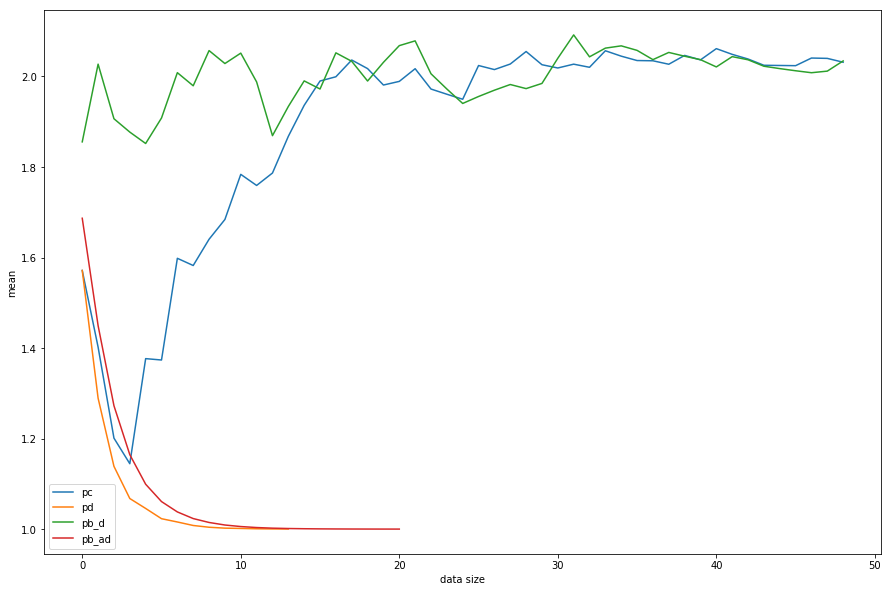

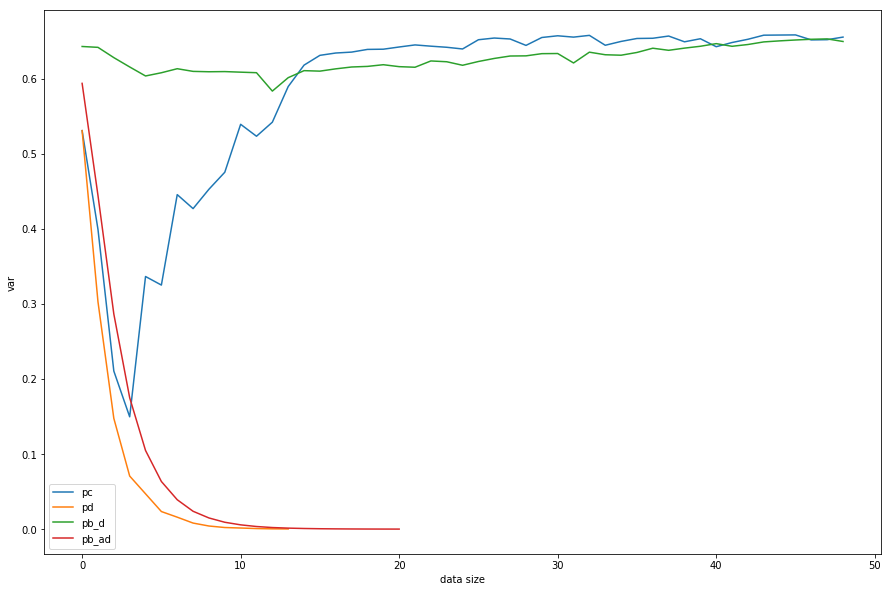

In [24]:
plt.figure(figsize=(15, 10))
for cur_mean, name in zip(means, names):
    plt.plot(cur_mean, label=name)
plt.legend()
axis = plt.gca()
axis.set_xlabel("data size")
axis.set_ylabel("mean")
plt.figure(figsize=(15, 10))
for cur_var, name in zip(vars, names):
    plt.plot(cur_var, label=name)
axis = plt.gca()
axis.set_xlabel("data size")
axis.set_ylabel("var")
plt.legend()
plt.show()

Приближенная модель без шансов провалилась (после размера выборки около 20 начинает генерировать NaNы, поэтому нет проболжения графика. Точная сработала хорошо.